In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Finetuning Results

In [23]:
finetuning_df = pd.read_csv('data/finetuning_comparison.csv')

In [24]:
finetuning_df

,model_name,0.2,0.7,1.2,1.7,2.2,2.7,3,3.5,4.2,4.7,5,is_train,training_time,gpu_vram,num_epochs
0,DeepSeek-R1 8B 4-bit,1.89,1.76,1.25,1.11,0.68,0.56,0.55,0.53,0.51,0.48,0.46,True,50,24,5
1,DeepSeek-R1 8B 4-bit,1.92,1.68,1.54,1.21,0.77,0.54,0.51,0.51,0.47,0.44,0.44,False,50,24,5
2,DeepSeek-R1 8B 8-bit,1.96,1.80,1.25,1.05,0.60,0.35,0.31,NaN,NaN,NaN,NaN,True,29,24,3
3,DeepSeek-R1 8B 8-bit,2.10,1.76,1.34,1.12,0.65,0.32,0.32,NaN,NaN,NaN,NaN,False,29,24,3
4,Llama 3.2-3B-Instruct 8-bit,1.94,1.72,1.44,0.94,0.51,0.48,0.46,NaN,NaN,NaN,NaN,True,9,48,3
5,Llama 3.2-3B-Instruct 8-bit,1.96,1.80,1.53,1.20,0.68,0.44,0.44,NaN,NaN,NaN,NaN,False,9,48,3
6,Llama 3.2-8B-Instruct 8-bit,1.92,1.65,1.21,0.96,0.51,0.38,0.37,NaN,NaN,NaN,NaN,True,11,48,3
7,Llama 3.2-8B-Instruct 8-bit,1.98,1.74,1.23,1.11,0.44,0.41,0.41,NaN,NaN,NaN,NaN,False,11,48,3


In [25]:
def plot_model_performance(df, title):
    df_melted = df.melt(
    id_vars=["model_name", "is_train"], 
    value_vars=[str(x) for x in [0.2, 0.7, 1.2, 1.7, 2.2, 2.7, 3, 3.5, 4.2, 4.7, 5]],
    var_name="Epoch", 
    value_name="Cross-Entropy Loss"
)
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_melted, x="Epoch", y="Cross-Entropy Loss", hue="model_name", markers=True)

    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Cross-Entropy Loss")
    plt.legend(title="Model Name")
    plt.show()

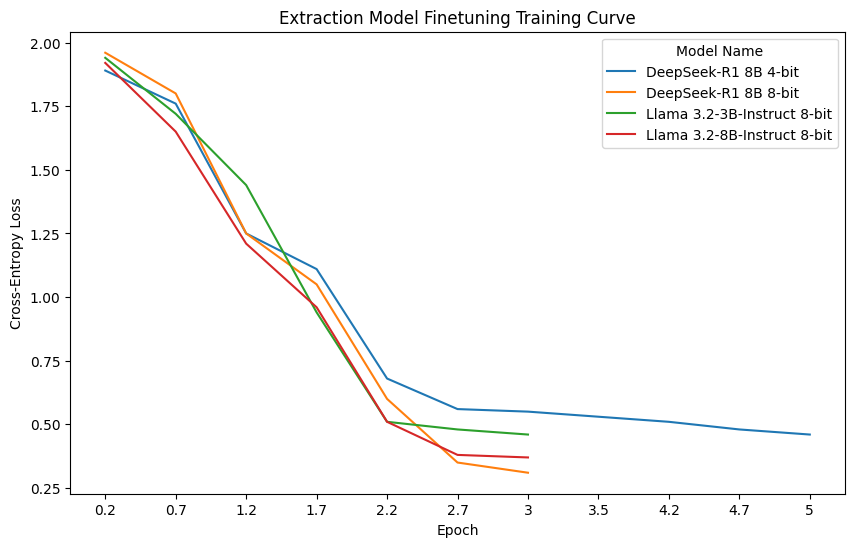

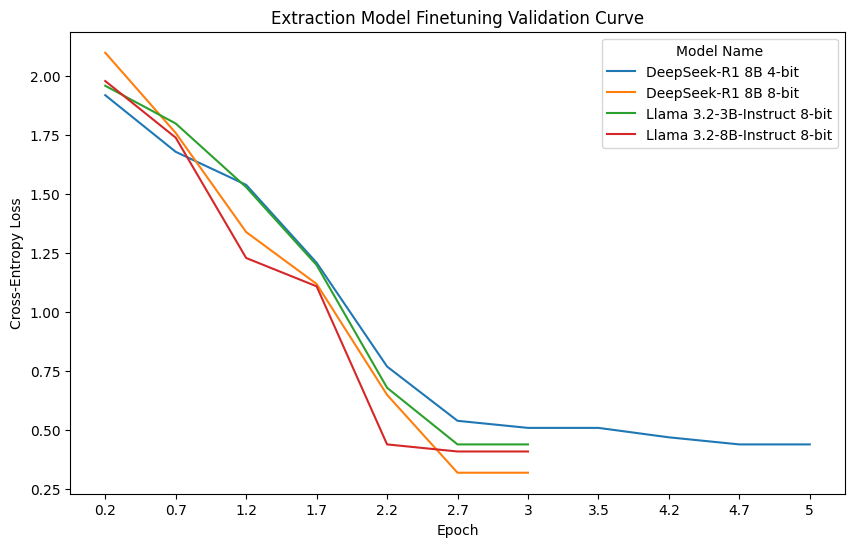

In [26]:
train_df = finetuning_df[finetuning_df['is_train'] == True]
validation_df = finetuning_df[finetuning_df['is_train'] == False]
plot_model_performance(train_df, "Extraction Model Finetuning Training Curve")
plot_model_performance(validation_df, "Extraction Model Finetuning Validation Curve")

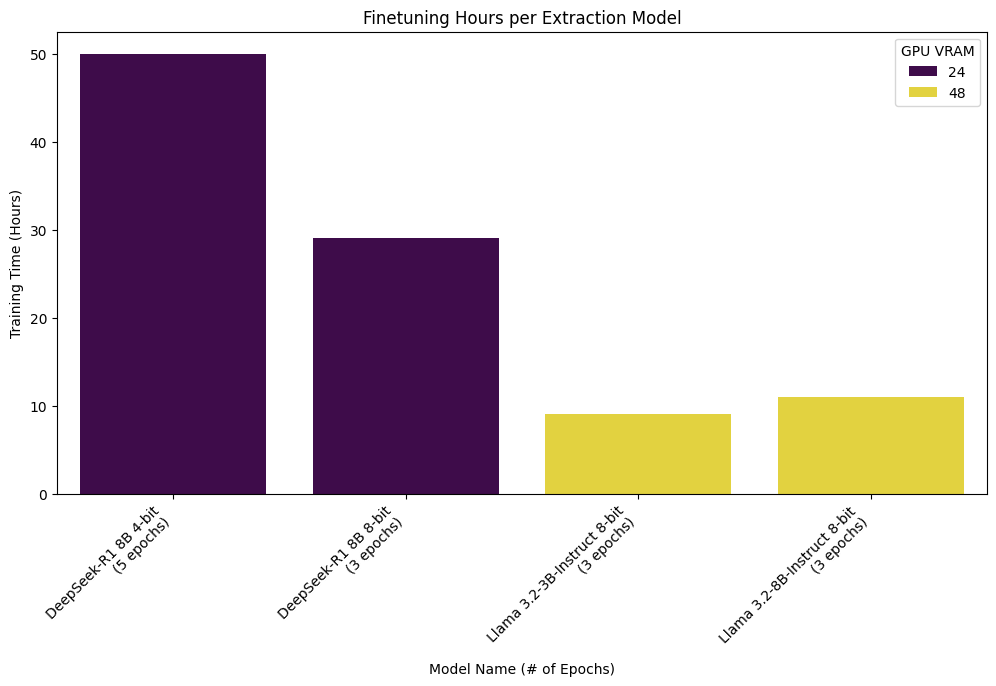

In [34]:
plt.figure(figsize=(12, 6))
finetuning_df["model_with_epochs"] = finetuning_df["model_name"] + "\n(" + finetuning_df["num_epochs"].astype(str) + " epochs)"

barplot = sns.barplot(
    data=finetuning_df, 
    x="model_with_epochs", 
    y="training_time", 
    hue="gpu_vram",
    palette="viridis"
)

plt.xticks(rotation=45, ha="right")  
plt.xlabel("Model Name (# of Epochs)")
plt.ylabel("Training Time (Hours)")
plt.title("Finetuning Hours per Extraction Model")
plt.legend(title="GPU VRAM")

plt.show()

### RAG Results

In [42]:
rag_df = pd.read_csv('data/rag_performance.csv')

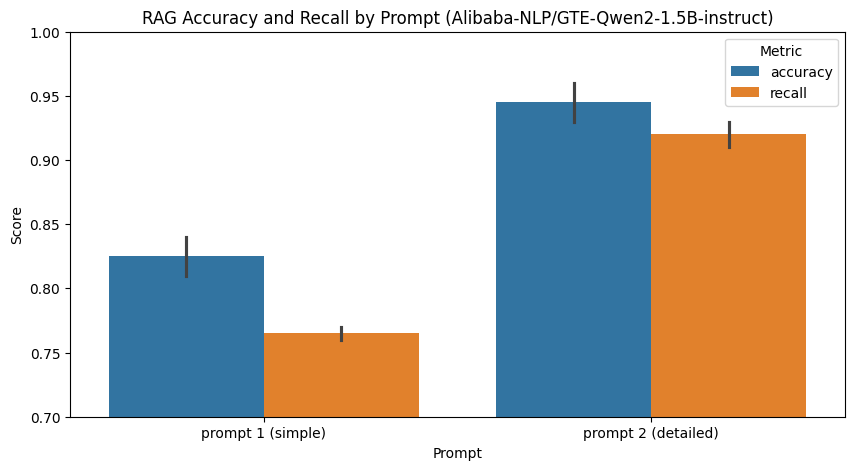

In [43]:
df_melted = rag_df.melt(id_vars=["rag_prompt", "similarity_metric"], var_name="metric", value_name="score")

# Create a grouped bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_melted, x="rag_prompt", y="score", hue="metric", dodge=True, hue_order=["accuracy", "recall"])

# Add labels and title
plt.xlabel("Prompt")
plt.ylabel("Score")
plt.title("RAG Accuracy and Recall by Prompt (Alibaba-NLP/GTE-Qwen2-1.5B-instruct)")
plt.ylim(0.7, 1)  # Adjust y-axis for clarity
plt.legend(title="Metric")

# Show plot
plt.show()